### SMA vs EWMA 
- **SMA** (simple moving average) has some weakness
 - smaller window size will leads to noise, rather than signal
 - it will always  lag by size of window
 - it will never reach its full peak or vally due to averaging the data
 - doesn't really inform you the future behavior
 - extream historical values can screw your model because of averaging
 - **to address these issues we will use EWMA (here we are using certain weights then they will imapct the model in a good way rather than just average the whole data)**
 - **EWMA**  models will apply more weights on recent data rather than historical data so that there is a good chance of forecasting compared to SMA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [8]:
airline = pd.read_csv('data/airline_passengers.csv', index_col= 'Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [9]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [10]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [11]:
airline.index = pd.to_datetime(airline.index)
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

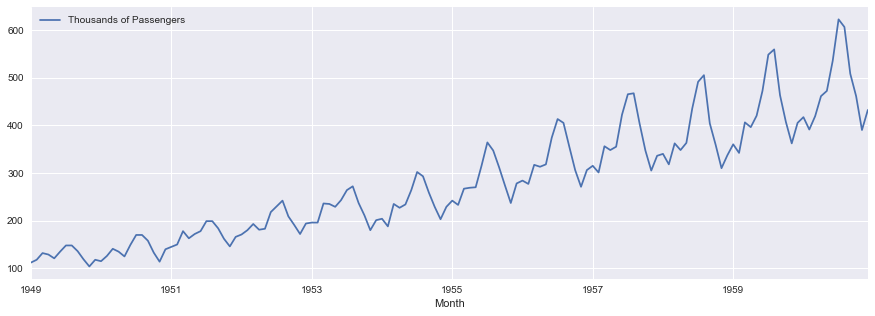

In [12]:
airline.plot(figsize = (15,5))
plt.show()

In [13]:
# if we want SMA
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

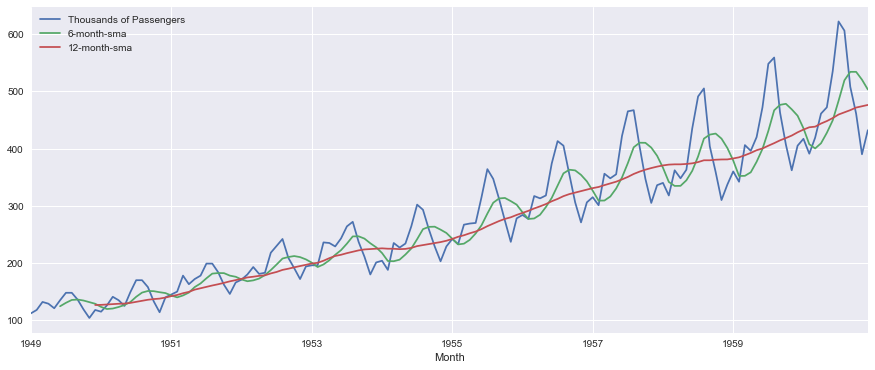

In [15]:
# using matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
airline.plot(figsize = (15,6))
plt.show()

In [16]:
airline.head(15)

,Thousands of Passengers,6-month-sma,12-month-sma
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


- **note** : it is clear that there is some lag when we dealt with 6-month-sma and 12-month-sma so, to avoid that we can go for **EWMA**

In [17]:
airline['6-month-EWMA'] = airline['Thousands of Passengers'].ewm(span = 6).mean()
airline['12-month-EWMA'] = airline['Thousands of Passengers'].ewm(span = 12).mean()

In [18]:
airline.head(15) # there is no lagging points for 12-month-EWMA

,Thousands of Passengers,6-month-sma,12-month-sma,6-month-EWMA,12-month-EWMA
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.500000,115.250000
1949-03-01,132,NaN,NaN,122.917431,121.787529
1949-04-01,129,NaN,NaN,125.266892,124.064224
1949-05-01,121,NaN,NaN,123.769332,123.231685
1949-06-01,135,124.500000,NaN,127.469517,126.092005
1949-07-01,148,130.500000,NaN,133.950151,130.980697
1949-08-01,148,135.500000,NaN,138.256171,134.532364
1949-09-01,136,136.166667,NaN,137.578764,134.822714


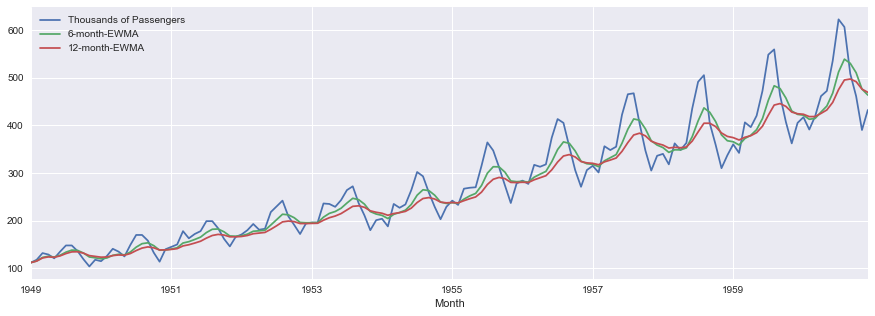

In [19]:
airline[['Thousands of Passengers','6-month-EWMA', '12-month-EWMA']].plot(figsize = (15,5), legend = True)
plt.show()

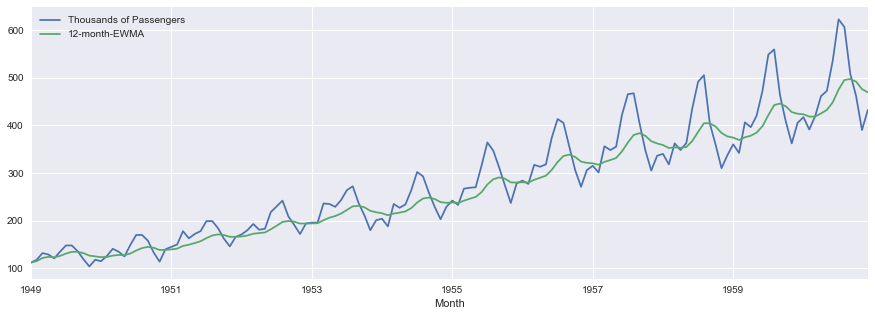

In [20]:
airline[['Thousands of Passengers', '12-month-EWMA']].plot(figsize = (15,5), legend = True)
plt.show()

 - **Note** : when compared to SMA here for 12 month line plot is somehow similar to original data because of weighted averages rather than simple moving averages